<a href="https://colab.research.google.com/github/RafalDoroz/mun/blob/main/knn_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Importujemy potrzebne biblioteki
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [11]:
# Wczytujemy dane - w tym przypadku zestaw cancer
cancer = load_breast_cancer()
X = cancer.data  # dane wejściowe
y = cancer.target  # etykiety (klasy)




In [12]:
# Tworzymy DataFrame z danymi cancer
cancer_df = pd.DataFrame(data=X, columns=cancer.feature_names)
cancer_df['target'] = y

# Wyświetlamy pierwsze 5 wierszy zbioru danych
print("Zbiór danych cancer:")
print(cancer_df.head())


Zbiór danych cancer:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst a

In [13]:
# Podzielmy dane na zbiór treningowy i testowy (70% - trening, 30% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [14]:
# Inicjalizujemy klasyfikator K-Nearest Neighbors (KNN) z domyślną liczbą sąsiadów (k=5)
knn = KNeighborsClassifier()
#knn = KNeighborsClassifier(n_neighbors=3)


In [15]:
# Trenujemy model na danych treningowych
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [16]:
# Klasyfikacja jednej próbki

# Wybieramy losową próbkę ze zbioru testowego
sample_index = 3
sample = X_test[sample_index].reshape(1, -1)  # Dopasowanie wymiarów próbki
#sample = [[5.1, 3.5, 1.4, 0.2]]

# Dokonujemy predykcji dla wybranej próbki
predicted_class = knn.predict(sample)
actual_class = y_test[sample_index]

# Wyświetlamy wyniki klasyfikacji jednej próbki
print(f'Próbka: {sample}')
print(f'Rzeczywista klasa: {cancer.target_names[actual_class]}')
print(f'Przewidywana klasa: {cancer.target_names[predicted_class[0]]}')

Próbka: [[1.240e+01 1.768e+01 8.147e+01 4.678e+02 1.054e-01 1.316e-01 7.741e-02
  2.799e-02 1.811e-01 7.102e-02 1.767e-01 1.460e+00 2.204e+00 1.543e+01
  1.000e-02 3.295e-02 4.861e-02 1.167e-02 2.187e-02 6.005e-03 1.288e+01
  2.291e+01 8.961e+01 5.158e+02 1.450e-01 2.629e-01 2.403e-01 7.370e-02
  2.556e-01 9.359e-02]]
Rzeczywista klasa: benign
Przewidywana klasa: benign


In [17]:
# Dokonujemy predykcji na danych testowych
y_pred = knn.predict(X_test)


In [18]:
# Wyświetlamy dokładność modelu
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Dokładność modelu: {accuracy}')
print(classification_report(y_test, y_pred))



Dokładność modelu: 0.9590643274853801
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [19]:
# Wyświetlamy macierz pomyłek
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Macierz pomyłek:\n{conf_matrix}")

Macierz pomyłek:
[[ 57   6]
 [  1 107]]


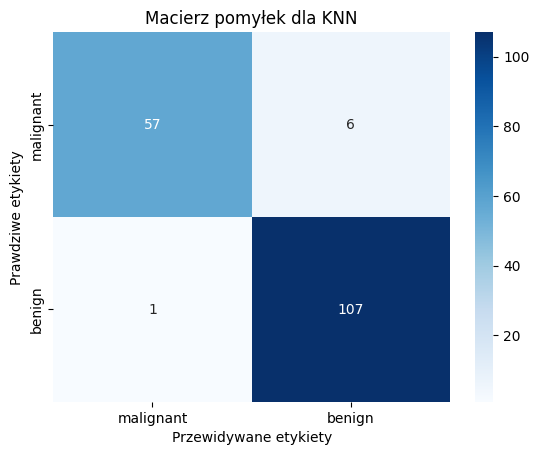

In [20]:
# Wizualizacja macierzy pomyłek
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Przewidywane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz pomyłek dla KNN')
plt.show()